# Week 12: DATA CLUSTERING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

## Q1

Write a python code without using scikit-learn library, to create a DataFrame that contains the following three variables for 20 different basketball players:

points, 
assists, 
rebounds, 

Apply the K.means algorithm to identify the clusters and to do the following:

a. Plot that displays the number of clusters on the x-axis and the Sum Squared Error (SSE) on the y-axis

b. Plot the clusters in different color.

In [2]:
df = pd.read_csv('/home/AIML_Student/Documents/B34_aiml/Lab12/data.csv')
df

,points,assists,rebounds
0,18,3,15
1,19,4,14
2,14,5,10
3,14,4,8
4,11,7,14
5,20,8,13
6,28,7,9
7,30,6,5
8,31,9,4
9,35,12,11


In [3]:
x = df.to_numpy()
x

array([[18,  3, 15],
       [19,  4, 14],
       [14,  5, 10],
       [14,  4,  8],
       [11,  7, 14],
       [20,  8, 13],
       [28,  7,  9],
       [30,  6,  5],
       [31,  9,  4],
       [35, 12, 11],
       [33, 14,  6],
       [25,  9,  5],
       [25,  4,  3],
       [27,  3,  8],
       [29,  4, 12],
       [30, 12,  7],
       [19, 15,  6],
       [23, 11,  5]])

No missing values in dataset

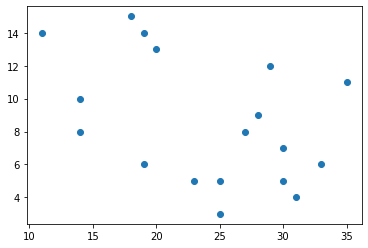

In [81]:
plt.scatter(x[:,[0]], x[:, 2])
plt.show()

### performing k-means clustering:

In [4]:
m = x.shape[0] #number of samples
n = x.shape[1] #number of features

n_itr = 50 #number of iterations

In [5]:
#test
a = [1, 2, 3, 4]
print(a.index(2))

1


In [6]:
#selecting k
k = 3

In [7]:
#test:
output = {"0":[],"1":[],"2":[]} #dictionary with cluster values as keys

print(output['0'])

[]


In [36]:
def initialize(k):
    centroids = [] #selecting random centroids - here, the first 3 rows
    output = {}
    for i in range(int(k)):
        centroids.append(list(x[i])) #k number of centroids
        output[str(i)] = [] #creating empty list for each cluster
    return centroids, output
   
centroids, output = initialize(3)
print(centroids)

print(output)

[[18, 3, 15], [19, 4, 14], [14, 5, 10]]
{'0': [], '1': [], '2': []}


In [23]:
def cluster(k, centroids):
    
    c, output = initialize(k)
    
    for i in x: #for each value in x
        dist = [] #euclidian distance of each point with centroid
        for j in centroids: #for each centroid
            d = 0
            for p in range(len(i)): #for each column of value
                a = j[p] - i[p]
                d+= a**2
            d = sqrt(d)
            dist.append(d) #distance from each centroid
        min_val = str(dist.index(min(dist)))
        output[min_val].append(list(i))
    return output

In [10]:
#test: 
p = [3,3,3]
# print(p/3) doesnt work
p[:]= [x/3 for x in p]
print(p)

[1.0, 1.0, 1.0]


In [11]:
print(len(output.keys()))

3


In [12]:
def new_centroids(output):
    c= []
    sum_vals = []
        
    for key, values in output.items():
        
        sum_vals = []
        for i in range(len(output.keys())): #for each column
            sum_vals.append(0) #initial value for sum of each column
            
        n = len(values)
        for v in values: #finding sum for each column
            for i in range(len(v)):
                sum_vals[i] += v[i]
        #print(f"cluster: {key} sum: {sum}")
        sum_vals[:] = [x/n for x in sum_vals] #finding mean
        c.append(sum_vals) 
    return c

In [29]:
print(output)
print(centroids)

{'0': [], '1': [], '2': []}
[[18, 3, 15], [19, 4, 14], [14, 5, 10]]


In [30]:
k = 3
output = cluster(3, centroids)
output

3


{'0': [[18, 3, 15]],
 '1': [[19, 4, 14],
  [20, 8, 13],
  [28, 7, 9],
  [30, 6, 5],
  [31, 9, 4],
  [35, 12, 11],
  [33, 14, 6],
  [25, 9, 5],
  [25, 4, 3],
  [27, 3, 8],
  [29, 4, 12],
  [30, 12, 7]],
 '2': [[14, 5, 10], [14, 4, 8], [11, 7, 14], [19, 15, 6], [23, 11, 5]]}

In [31]:
new_centroids(output)

[[18.0, 3.0, 15.0],
 [27.666666666666668, 7.666666666666667, 8.083333333333334],
 [16.2, 8.4, 8.6]]

implementing clustering:

In [37]:
k = 3
centroids, output = initialize(k)

for i in range(n_itr):
    output = cluster(k, centroids)
    centroids = new_centroids(output)

In [38]:
print("Final clusters: ")
for k, v in output.items():
    print(f"\nkey: {k} \nvalues: {v}")

Final clusters: 

key: 0 
values: [[18, 3, 15], [19, 4, 14], [20, 8, 13]]

key: 1 
values: [[28, 7, 9], [30, 6, 5], [31, 9, 4], [35, 12, 11], [33, 14, 6], [25, 9, 5], [25, 4, 3], [27, 3, 8], [29, 4, 12], [30, 12, 7], [23, 11, 5]]

key: 2 
values: [[14, 5, 10], [14, 4, 8], [11, 7, 14], [19, 15, 6]]


In [42]:
#SSE - Sum of Squares of distance of each point to closest centroid
#goal of k_means is to minimize this value

def calc_SSE(output, centroid):
    SSE = 0
    sse_key = 0
    for key, val in output.items():
        c = centroid[ int(key)]
        sse_key = 0
        for v in val: #for each value
            dist = 0
            curr = 0
            for i in range(len(v)): #for each column in value
                curr = c[i] - v [i]
                dist+= curr**2 
            #dist = sqrt(dist) - need sum of SQUARES of distances
            sse_key += dist #adding square of each dist to SSE
        SSE += sse_key
    return SSE

In [43]:
SSE = calc_SSE(output, centroids)
print(SSE)

514.75


a. Plot that displays the number of clusters on the x-axis and the Sum Squared Error (SSE) on the y-axis

In [44]:
y = []
k_vals = [3, 5, 7, 9]
for k in k_vals:
    centroids, output = initialize(k)

    for i in range(n_itr):
        output = cluster(k, centroids)
        centroids = new_centroids(output)
        
    SSE = calc_SSE(output, centroids)
    y.append(SSE)

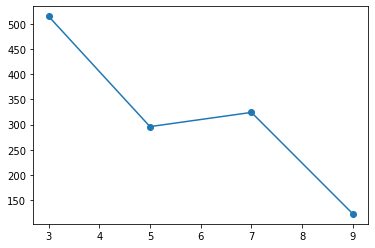

In [46]:
plt.plot(k_vals, y, marker = 'o')
plt.show()

b. Plot the clusters in different color.

In [47]:
#k = k_vals[y.index(min(y))] #k value with min SSE

In [82]:
k = 5 #taking k= 5

centroids, output = initialize(k)

for i in range(n_itr):
    output = cluster(k, centroids)
    centroids = new_centroids(output)

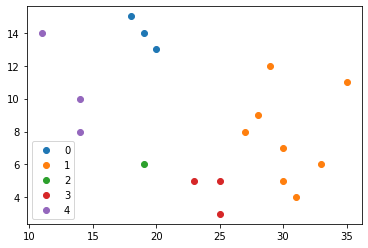

In [84]:
for k, v in output.items():
    vals = np.array(v).reshape(-1, 3)
    plt.scatter(vals[:,[0]], vals[:, [2]], marker = 'o', label = k)
plt.legend()
plt.show()